# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#Installed using pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Create URL with API
#Temperature Units
units = "imperial"
#URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=830d535e54a6eb5130efb5827e5bd130&units=imperial&q='

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set lists for the dataframe
city_name = []
cloudy = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudy.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("Skipping, city was not found")
print("------------------------------\nData Retrieval Complete\n------------------------------")    

Processing Record 1 of Set 1 | luanda
Processing Record 2 of Set 1 | beringovskiy
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | verkhoyansk
Processing Record 5 of Set 1 | punta arenas
Skipping, city was not found
Processing Record 6 of Set 1 | constantine
Processing Record 7 of Set 1 | loanda
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | auki
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | benghazi
Processing Record 13 of Set 1 | afsin
Processing Record 14 of Set 1 | mahebourg
Skipping, city was not found
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | meulaboh
Processing Record 17 of Set 1 | mataura
Skipping, city was not found
Processing Record 18 of Set 1 | otane
Skipping, city was not found
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | voh
Processing Record 22 of Set 1 | bu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create Dictionary
weather = ({"City": city_name,
            "Cloudiness": cloudy,
            "Country": countries,
            "Date": dates,
            "Humidity": humidity,
            "Lat": lats,
            "Lng": lngs,
            "Max Temp": max_temps,
            "Wind Speed": wind_speeds
           })
#Create DF
weather_df = pd.DataFrame(weather)
#Print DF
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,luanda,3,AO,1651983326,89,-8.8368,13.2343,74.37,6.31
1,beringovskiy,100,RU,1651983143,97,63.0500,179.3167,33.62,5.70
2,barrow,100,US,1651983326,86,71.2906,-156.7887,24.82,3.44
3,verkhoyansk,100,RU,1651983327,73,67.5447,133.3850,31.57,7.02
4,punta arenas,100,CL,1651983328,70,-53.1500,-70.9167,44.11,9.48
...,...,...,...,...,...,...,...,...,...
565,komatipoort,3,ZA,1651983580,94,-25.4332,31.9548,62.40,1.70
566,ust-kuyga,100,RU,1651983580,74,70.0167,135.6000,25.90,7.83
567,mahibadhoo,98,MV,1651983581,76,3.7833,72.9667,84.47,13.73
568,frontino,99,CO,1651983581,94,6.7801,-76.1288,62.98,1.77


In [6]:
#Export DF to CSV
weather_df.to_csv("weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
greater_humidity = weather_df.query("Humidity > 100")
greater_humidity

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
This plot shows the relationship between the Latitude of the city and the Max Temps of those areas.  The closer the cities are to the equator the higher the max temp is. 

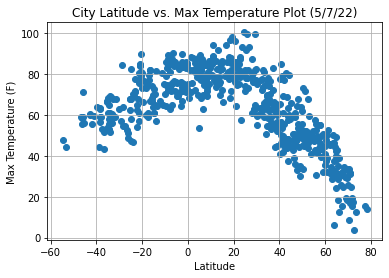

In [9]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature Plot (5/7/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Figures/fig1.png")
plt.show()

## Latitude vs. Humidity Plot
This plot shows the relationship between the Latitude of the city and the Humidity of those areas.  The plot does not show clearly what a factor for humidity would be, even though you would think it would fall under the closest to the equator you can see that that would not be a factor.

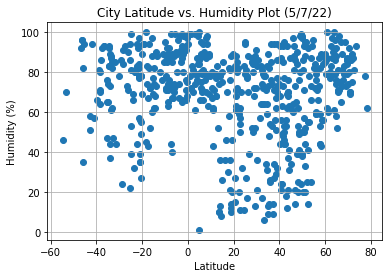

In [10]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"])
plt.title("City Latitude vs. Humidity Plot (5/7/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Figures/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot
This plot shows the relationship between the Latitude of the city and the cloudiness of those areas.  This data appears to show no difference between the latitude of a city and how humid it is.

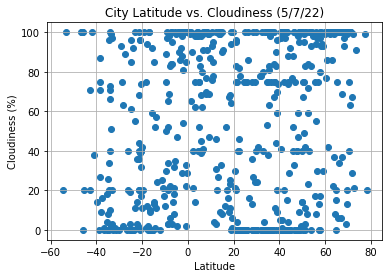

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (5/7/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Figures/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot
This plot shows the relationship between the Latitude of the city and the Wind Speeds of those areas.  This plot dipicts mostly low wind speeds throughout the cities, the majority being below 25 mph.

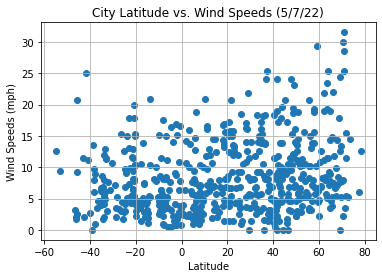

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speeds (5/7/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds (mph)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [24]:
#Determine Northern & Souther Hemispheres
northern = weather_df.loc[weather_df["Lat"] >= 0] 
southern = weather_df.loc[weather_df["Lat"] < 0]
#Define Linear Regression & scatter plot
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    return line_eq
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(x_values.median(), y_values.median()),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.87x + 92.82


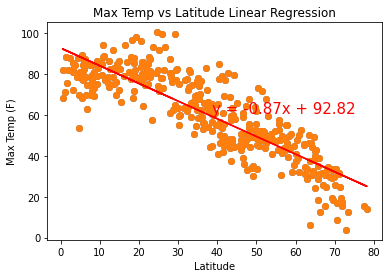

In [26]:
x_values = northern["Lat"]
y_values = northern["Max Temp"]
equation = linear_regression(x_values, y_values)
annotate(equation, 0 ,0)
plt.title("Max Temp vs Latitude Linear Regression")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.savefig("Figures/fig5.png")
plt.show
print(linear_regression(x_values, y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.56x + 80.48


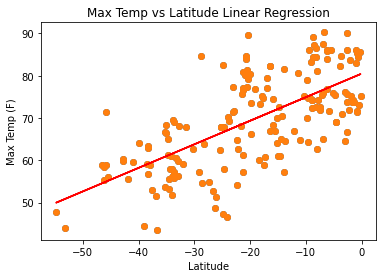

In [27]:
x_values = southern["Lat"]
y_values = southern["Max Temp"]
equation = linear_regression(x_values, y_values)
plt.title("Max Temp vs Latitude Linear Regression")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.savefig("Figures/fig6.png")
plt.show
print(linear_regression(x_values, y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.1x + 62.34


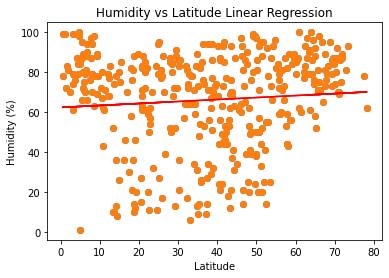

In [28]:
x_values = northern["Lat"]
y_values = northern["Humidity"]
equation = linear_regression(x_values, y_values)
plt.title("Humidity vs Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("Figures/fig7.png")
plt.show
print(linear_regression(x_values, y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.25x + 80.49


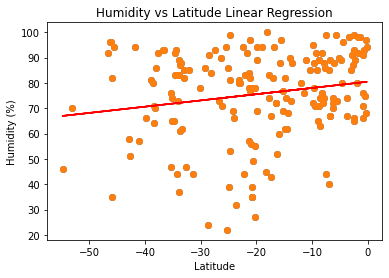

In [29]:
x_values = southern["Lat"]
y_values = southern["Humidity"]
equation = linear_regression(x_values, y_values)
plt.title("Humidity vs Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("Figures/fig8.png")
plt.show
print(linear_regression(x_values, y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.12x + 53.08


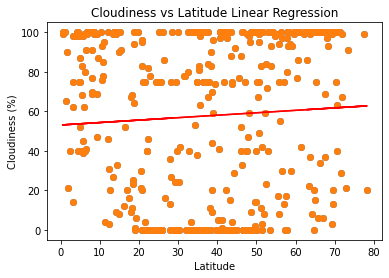

In [30]:
x_values = northern["Lat"]
y_values = northern["Cloudiness"]
equation = linear_regression(x_values, y_values)
plt.title("Cloudiness vs Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("Figures/fig9.png")
plt.show
print(linear_regression(x_values, y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.53x + 57.6


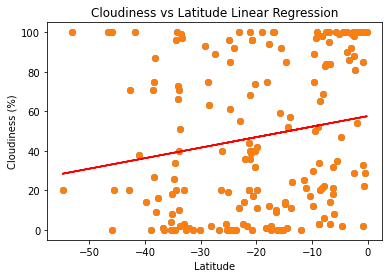

In [31]:
x_values = southern["Lat"]
y_values = southern["Cloudiness"]
equation = linear_regression(x_values, y_values)
plt.title("Cloudiness vs Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("Figures/fig10.png")
plt.show
print(linear_regression(x_values, y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.06x + 6.86


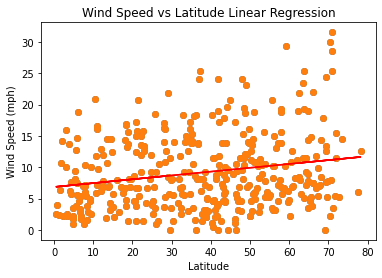

In [32]:
x_values = northern["Lat"]
y_values = northern["Wind Speed"]
equation = linear_regression(x_values, y_values)
plt.title("Wind Speed vs Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Figures/fig11.png")
plt.show
print(linear_regression(x_values, y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.04x + 5.99


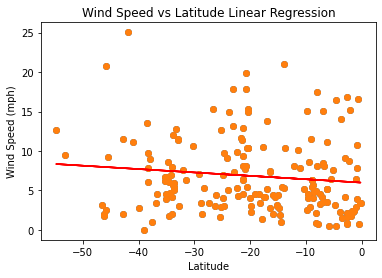

In [33]:
x_values = southern["Lat"]
y_values = southern["Wind Speed"]
equation = linear_regression(x_values, y_values)
plt.title("Wind Speed vs Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Figures/fig12.png")
plt.show
print(linear_regression(x_values, y_values))